### Importing The Libraries

In [131]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

#### 1. Create a Dataframe from the given data, perform basic EDA and check if data cleaning is required.


In [132]:
data = pd.read_csv('xAPI-Edu-Dataset.csv')
data.sample(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
304,F,Jordan,Jordan,lowerlevel,G-04,B,Science,F,Father,15,50,24,43,Yes,Bad,Under-7,M
104,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,0,12,3,3,Yes,Good,Above-7,M
128,M,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Father,12,10,20,16,No,Bad,Under-7,L
269,M,Jordan,Jordan,MiddleSchool,G-06,A,English,S,Father,18,28,40,20,Yes,Bad,Above-7,M
107,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,70,90,41,33,Yes,Bad,Under-7,H


In [133]:
# Basic Info & checking null values
data.info()
data.isnull().sum()
# There are no null values in the given dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [134]:
# Shape of the data
data.shape

(480, 17)

In [135]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [136]:
# Cleaning The Columns Names 
data.rename(
    columns={"NationalITy": "nationality",'PlaceofBirth' : "birthPlace", "StageID": "stage_ID", "GradeID": "grade_ID", "SectionID":"section_ID", "Topic":"topic","Semester":"semester","Relation":"relation","raisedhands":"handsRaised","VisITedResources":"visitedResources","AnnouncementsView":"announcementsView","Discussion":"discussion",'ParentAnsweringSurvey':"parentsAnswered","ParentschoolSatisfaction":"parentsSatisfied","StudentAbsenceDays":"studentAbsentDays","Class":"class" },
    inplace=True,
)
data.head()

,gender,nationality,birthPlace,stage_ID,grade_ID,section_ID,topic,semester,relation,handsRaised,visitedResources,announcementsView,discussion,parentsAnswered,parentsSatisfied,studentAbsentDays,class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### 2. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

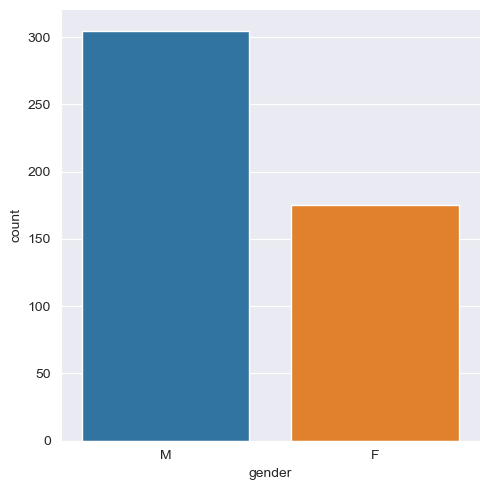

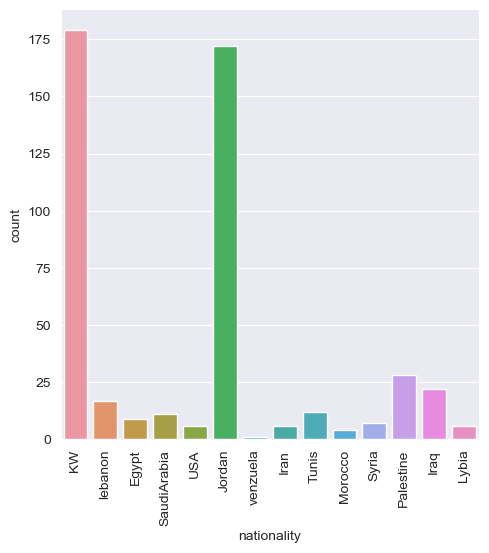

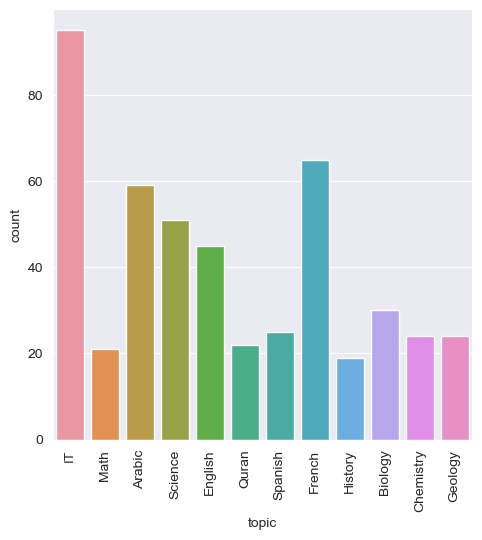

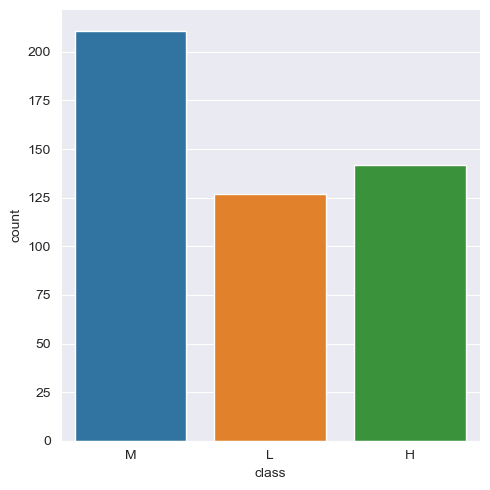

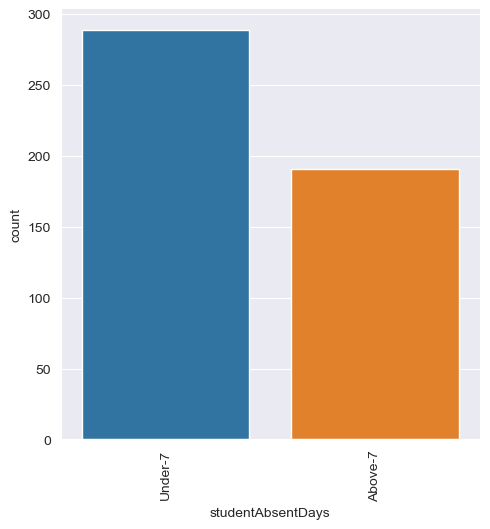

In [137]:
# Gender Category
sns.catplot(x='gender', kind='count', data=data)
plt.show()
# Nationality
sns.catplot(x='nationality', kind='count',data=data)
plt.xticks(rotation=90)
plt.show()
# Topic
sns.catplot(x='topic', kind='count', data=data)
plt.xticks(rotation=90)
plt.show()
# Class
sns.catplot(x='class', kind='count', data=data)
plt.show()
sns.catplot(x='studentAbsentDays', kind='count', data=data)
plt.xticks(rotation=90)
plt.show()

            CONCLUSION - 
* 1 Majority of the topic is - IT
* 2 Nationality is - KW & JORDON

#### 3. Look at some categorical features in relation to each other, to see what insights could be possibly read?

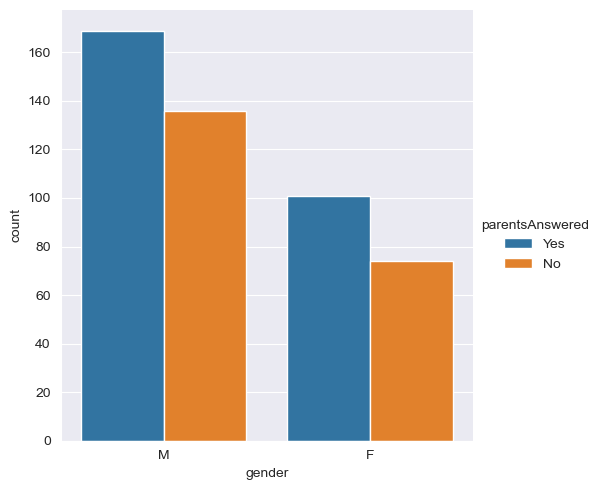

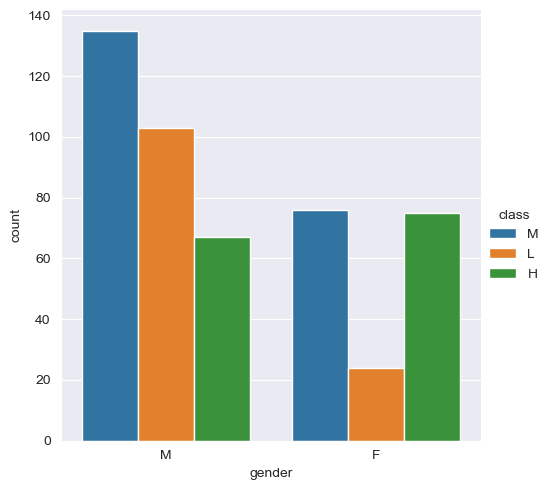

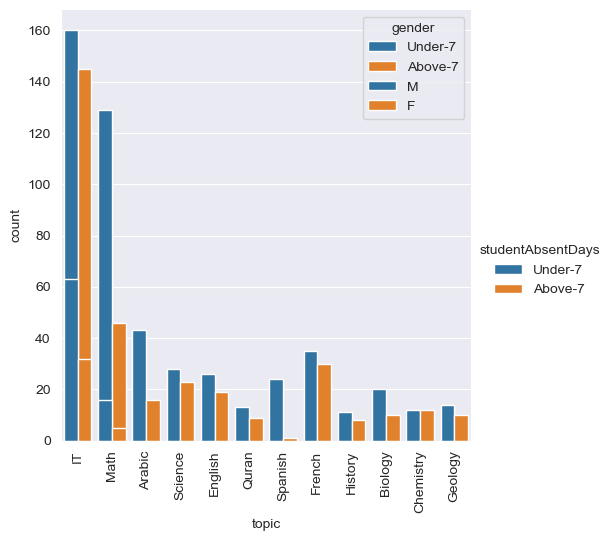

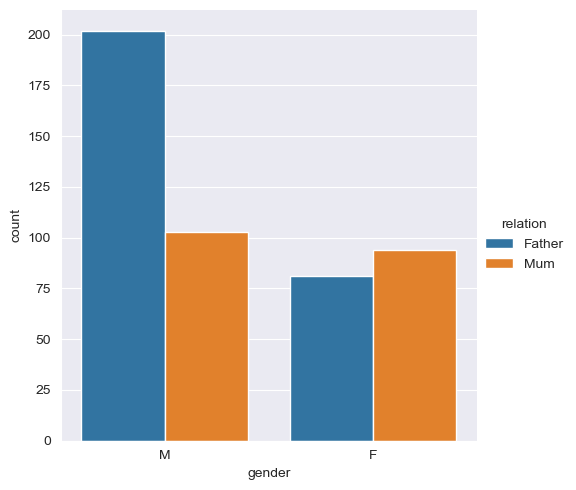

In [138]:
sns.catplot(x='gender', kind='count', hue='parentsAnswered', data=data)
sns.catplot(x='gender', kind='count', hue='class', data=data)
sns.catplot(x='gender', kind='count', hue='studentAbsentDays', data=data)
sns.countplot(x='topic', hue='gender', data=data)
plt.xticks(rotation=90)
sns.catplot(x='gender', kind='count', hue='relation', data=data)
plt.show()

            CONCLUSION  
* 1 Girls has lesser leaves than boys.
* 2 There are more boys in any of the topics than girls
* 3 There is equal balance of girls in H and M class whereas boys are more in M than L than H

#### 4. Visualize categorical variables with numerical variables and give conclusions?

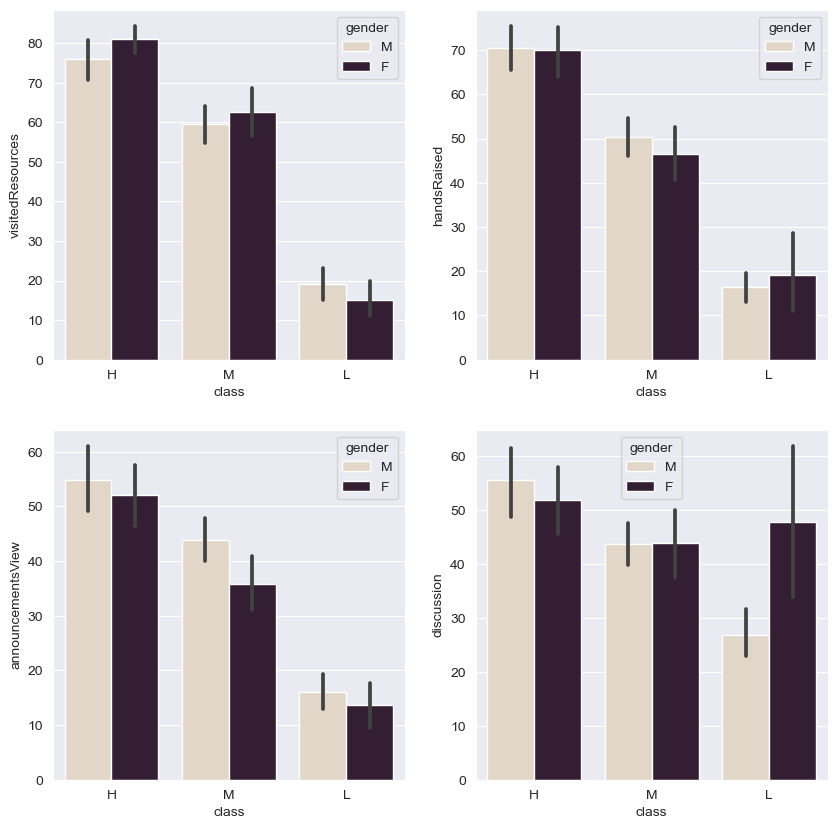

In [139]:
# Numeric Data = handsRaised, visitedResources, announcementViews, discussion
fig, cat_num  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='class', y='visitedResources', data=data, order=['H','M','L'], ax=cat_num[0,0], hue='gender',palette="ch:.25")
sns.barplot(x='class', y='handsRaised', data=data, order=['H','M','L'], ax=cat_num[0,1],hue='gender',palette="ch:.25")
sns.barplot(x='class', y='announcementsView', data=data, order=['H','M','L'], ax=cat_num[1,0],hue='gender',palette="ch:.25")
sns.barplot(x='class', y='discussion', data=data, order=['H','M','L'], ax=cat_num[1,1],hue='gender',palette="ch:.25")
plt.show()
# data['gender'].value_counts() 
# BOYS - 305, GIRLS - 175

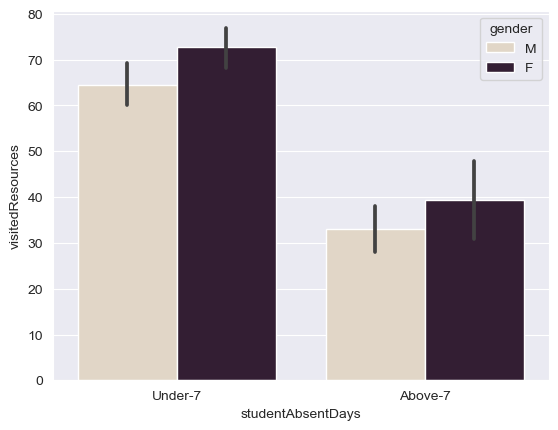

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             480 non-null    object
 1   nationality        480 non-null    object
 2   birthPlace         480 non-null    object
 3   stage_ID           480 non-null    object
 4   grade_ID           480 non-null    object
 5   section_ID         480 non-null    object
 6   topic              480 non-null    object
 7   semester           480 non-null    object
 8   relation           480 non-null    object
 9   handsRaised        480 non-null    int64 
 10  visitedResources   480 non-null    int64 
 11  announcementsView  480 non-null    int64 
 12  discussion         480 non-null    int64 
 13  parentsAnswered    480 non-null    object
 14  parentsSatisfied   480 non-null    object
 15  studentAbsentDays  480 non-null    object
 16  class              480 non-null    object
dt

In [140]:
sns.barplot(x='studentAbsentDays',y='visitedResources', data=data,hue='gender',palette="ch:.25")
plt.show()
data.info()

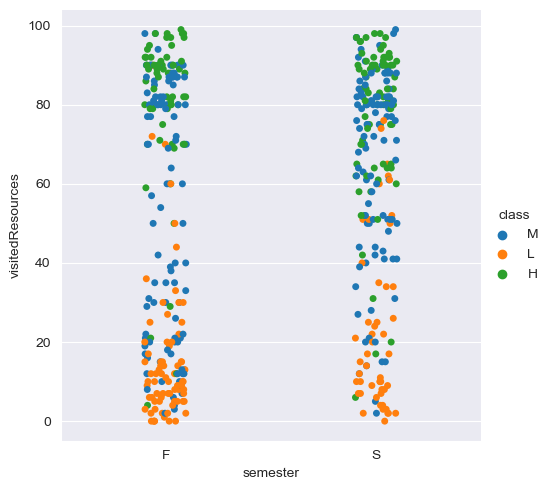

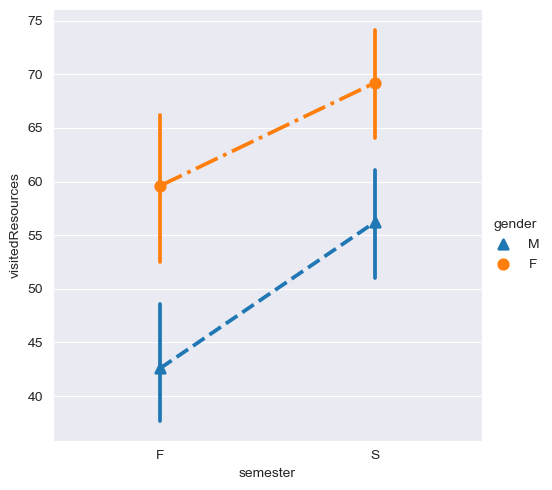

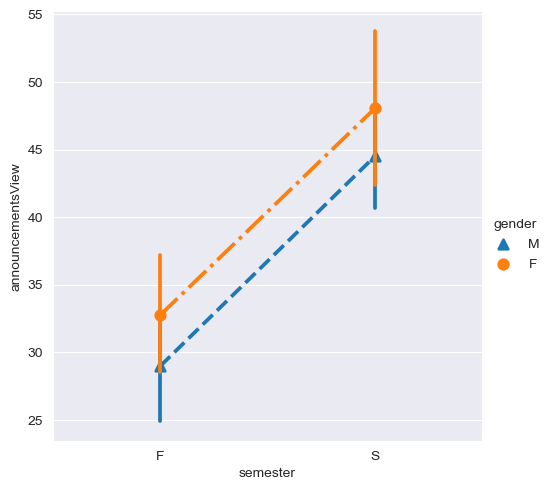

In [141]:
sns.catplot(x='semester', y='visitedResources',kind='strip', data=data,hue='class')
sns.catplot(data=data, x="semester", y="visitedResources", hue="gender",markers=["^", "o"], linestyles=["--", "-."],kind="point")
sns.catplot(data=data, x="semester", y="announcementsView", hue="gender",markers=["^", "o"], linestyles=["--", "-."],kind="point")
plt.show()

            CONCLUSION
* 1 Students that have lower attendance tends to visit the resources more than the students having better attendance.
* 2 Girls were visiting the resources more than the boys.  
* 3 Students were visiting the resources & viewing announcements more often in Semester II than I.
* 4 H class students were more active in visiting Resources than remaining 2 classes.

#### 6. Build classification model using Logistic Regression and present it's confusion matrix and classification report.


In [142]:
numeric_class = data.iloc[:,-1]
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
numeric_class = label.fit_transform(numeric_class)
numeric_class = pd.DataFrame(numeric_class)
numeric_class

,0
0,2
1,2
2,1
3,1
4,2
...,...
475,1
476,2
477,2
478,1


#### Merging The and Using Label Coding on Target

In [143]:
data = pd.concat([data,numeric_class],axis=1)

In [144]:
data = data.drop(columns=['class'])

In [145]:
data['numeric_class'] = data.iloc[:,-1] 
data = data.drop(data.columns[[16]],axis=1)

In [146]:
data.head()

,gender,nationality,birthPlace,stage_ID,grade_ID,section_ID,topic,semester,relation,handsRaised,visitedResources,announcementsView,discussion,parentsAnswered,parentsSatisfied,studentAbsentDays,numeric_class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,2


In [147]:
dummies_data = pd.get_dummies(data,drop_first=True)



In [148]:
features = dummies_data.drop(['numeric_class'],axis = 1)
target = dummies_data['numeric_class']

#### Standard Scaling

In [149]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(features)

In [150]:
# Splitting The Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,target,train_size=0.3,random_state=45)

In [151]:
from sklearn.linear_model import LogisticRegression

Logit = LogisticRegression()
Logit.fit(X_train,y_train)

LogisticRegression()

In [152]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

y_pred = Logit.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

In [153]:
print(report)
print(cfm)
print(score)

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       100
           1       0.75      0.85      0.80        79
           2       0.72      0.62      0.67       157

    accuracy                           0.71       336
   macro avg       0.71      0.74      0.72       336
weighted avg       0.71      0.71      0.71       336

[[74  0 26]
 [ 0 67 12]
 [37 22 98]]
0.7113095238095238


#### 7. Justify the model. Tune the model using various techniques, if need be.

In [154]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(estimator=logreg,n_features_to_select=14)
rfe = rfe.fit(features, target)

In [155]:
selected_features=features.columns[rfe.support_]
X_rfe = features[selected_features]
selected_features

Index(['gender_M', 'nationality_Iraq', 'nationality_SaudiArabia',
       'birthPlace_Iraq', 'birthPlace_Lybia', 'birthPlace_SaudiArabia',
       'grade_ID_G-04', 'grade_ID_G-06', 'grade_ID_G-09', 'topic_Biology',
       'topic_Geology', 'relation_Mum', 'parentsAnswered_Yes',
       'studentAbsentDays_Under-7'],
      dtype='object')

In [156]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_rfe,target, test_size = 0.2, random_state = 10)
clf = LogisticRegression()
logreg_with_rfe = clf.fit(X_train, y_train)
y_pred = logreg_with_rfe.predict(X_test)
score_n = accuracy_score(y_test,y_pred)
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
Report = classification_report(y_test,y_pred)
print(Report)
print(score_n)

[[14  0  9]
 [ 0 19  4]
 [ 8  5 37]]
              precision    recall  f1-score   support

           0       0.64      0.61      0.62        23
           1       0.79      0.83      0.81        23
           2       0.74      0.74      0.74        50

    accuracy                           0.73        96
   macro avg       0.72      0.72      0.72        96
weighted avg       0.73      0.73      0.73        96

0.7291666666666666


In [157]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold=0.005)
X_trans = var.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(X_trans,target, test_size = 0.3, random_state = 10)
clf = LogisticRegression()
logreg_with_var = clf.fit(X_train, y_train)
y_pred = logreg_with_var.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
Report = classification_report(y_test,y_pred)
print(Report)

[[29  0  6]
 [ 1 29  9]
 [12  5 53]]
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        35
           1       0.85      0.74      0.79        39
           2       0.78      0.76      0.77        70

    accuracy                           0.77       144
   macro avg       0.77      0.78      0.77       144
weighted avg       0.78      0.77      0.77       144
